# Intro to Linear Regression

When our data is linear, we found that we can describe the correlation between two variables using Person's r and a line drawn through our data. This line can be called the *regression line* or the *line of best fit* and will help us describe our data and make predictions.

### Terminology

Once a line of best fine has been determined (by finding the slope and y-intercept), we can make estimates for unseen or future values. Our dataset, $\mathcal{D}$, consists of all the pairs of observed ($x$,$y$).

With the slope, $b$, and y-intercept, $a$, determined, we can make predictions $\hat{y}= bx+a$. For a known data point ($x$, $y$), the difference between $y$ and $\hat{y}$ is called the *residual*.

When conducting regression, $a$ and $b$, are known as *regression coefficients* for our sample data. For population parameters, it is common convention to use $\boldsymbol{\beta}$. In the simple linear regression case described above $\boldsymbol{\beta} = \{\beta_0,\beta_1\}$.

### Computing the Line of Best Fit
To compute the line of best fit, we imagine an optimization problem that attempts to minimize a loss function, the difference between our models outputs (our guesses), $\hat{y}$ and the actual value from our data $y$. $$\mathcal{L}(\hat{y}, y)$$

##### Minimize Sum of Residuals
One way we could think about computing the line of best fit is to minimize the sum of residuals,
$$\mathcal{L}(\hat{y}, y)=\underset{a, b}{\operatorname{\min}}\sum\limits_{(x,y)\in\mathcal{D}}y-\hat{y}$$
$$a, b =\underset{a, b}{\operatorname{\argmin}}\sum\limits_{(x,y)\in\mathcal{D}}y-\hat{y}$$

However, we will find that we can have poor lines of fit in this case. Because this method allows for negative residuals, our error seems smaller than it actually is given the cancellation of postive and negative terms.

For this reason, we usually employ an alternative method that either sums the squares or absolute values of residuals.

##### Minimize Sum of Absolute Residuals
To ensure the values of the residuals is always positive, we can consider summing the absolute value of residuals,
$$\mathcal{L}(\hat{y}, y)=\underset{a, b}{\operatorname{\min}}\sum\limits_{(x,y)\in\mathcal{D}}\lvert y-\hat{y}\rvert$$
$$a, b=\underset{a, b}{\operatorname{\argmin}}\sum\limits_{(x,y)\in\mathcal{D}}\lvert y-\hat{y}\rvert$$

As we learned in calculus, we can take the derivative of the expression to identify the minimum. In the case of an absolute value function, we have $$\underset{x}{\operatorname{\min}} \lvert x \rvert= \text{sign}(x)$$

We find that using the absolute value in our expression results in sparse solutions. In machine learning, using this term in a loss function is known as L1, or Lasso, regularization. While this is an option, we will look to the sum of squared residuals for this course.

##### Minimize Sum of Squared Residual
Another way to overcome the cancellation of positive and negative values is to square the residuals. Thus, our objective is to minimize this sum of the square of the residuals.
$$\mathcal{L}(\hat{y}, y)=\underset{a, b}{\operatorname{\min}}\sum\limits_{(x,y)\in\mathcal{D}}(y-\hat{y})^2$$
$$a, b=\underset{a, b}{\operatorname{\argmin}}\sum\limits_{(x,y)\in\mathcal{D}}(y-\hat{y})^2$$

In the case of uni-dimensional $x$ and take the derivative of our loss function, we can solve for the slope to find

$$b = {\operatorname{\argmin}}\sum\limits_{(x,y)\in\mathcal{D}}(y-\hat{y})^2 = \frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sum(x_i-\bar{x})^2}$$

Now, we can look back to our terms for our covariance, standard deviation, $S$, and Person's r, $r$. $$S_ = \sum(x_i-\bar{x})$$ $$r=\frac{\text{Cov}(X, Y)}{S_X\cdot S_Y}$$

We can now write $b$ in these terms. $$b=r\frac{S_Y}{S_X}$$

Therefore, we can now represent our regression line as $$\hat{y} = a + bx = a + r\frac{S_Y}{S_X}x$$

##### Solving for our $a$

Given our regression line is the maximum liklihood estimate, we know $\bar{x}$ and $\bar{y}$ are points on our line. Using these two points, we can solve for $a$. $$a = \bar{y} - r\frac{S_Y}{S_X}\bar{x}$$

##### Final Equation

Combining the terms for $a$ and $b$, we have $$\hat{y} = a + bx = \bar{y} - r\frac{S_Y}{S_X}\bar{x} + r\frac{S_Y}{S_X}x$$

So for any new data point, $x_{\text{new}}$, we can make predictions $\hat{y}_{\text{new}}$, by using the above equation after computing the necessary means, standard deviations, and $r$ from our sample data.

### Example

In [5]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./Data/Flight-Costs-Lesson-15.csv')
df

,Distance (miles),Cost (USD)
0,337,59.50
1,2565,509.50
2,967,124.50
3,5124,1480.40
4,2398,696.23
5,2586,559.50
6,7412,1481.50
7,522,474.50
8,1499,737.50


r = 0.9090036493537197
miles_std = 2315.336824548668
cost_std = 508.18700228798104
slope = 0.1995147465094843
miles_mean = 2601.1111111111113
cost_mean = 680.3477777777778
intercept = 161.38775380144136
coeff = [  0.19951475 161.3877538 ]
predicted cost for 4000 miles = 959.4467398393796
Distance for cost = 500 = 1697.1790412618016


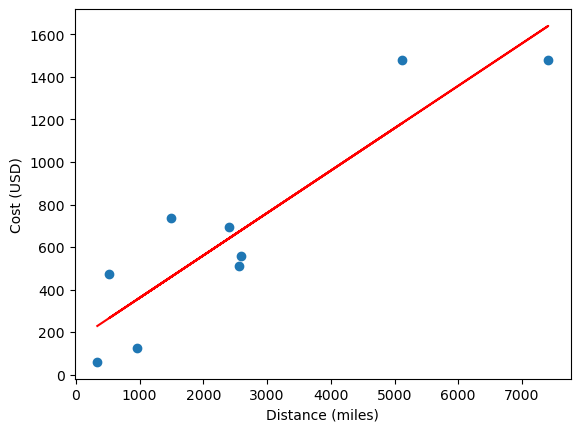

In [13]:
miles = df['Distance (miles)'].values
cost = df['Cost (USD)'].values

r = stats.pearsonr(miles, cost)[0]
miles_std = miles.std(ddof=1)
cost_std = cost.std(ddof=1)
print('r =', r)
print('miles_std =', miles_std)
print('cost_std =', cost_std)
print('slope =', r * cost_std / miles_std)
print('miles_mean =', miles.mean())
print('cost_mean =', cost.mean())
print('intercept =', cost.mean() - r * cost_std / miles_std * miles.mean())

coeff = np.polyfit(miles, cost, 1)
print('coeff =', coeff)
print('predicted cost for 4000 miles =', np.poly1d(coeff)(4000))
print('Distance for cost = 500 =', (500 - coeff[1]) / coeff[0])

plt.scatter(miles, cost)
plt.plot(miles, np.poly1d(coeff)(miles), color='red')
plt.xlabel('Distance (miles)')
plt.ylabel('Cost (USD)')
plt.show()

### Variance

In the below example, the expected value for each of the lines of best fit will be nearly the same. However, in one, we can expect the actual value observed to be closer to the predicted value.

Which do you think will be closer to the predicted value?  
Answer: Blue dots/red line - The variance is less for these data points making our prediction more reliable.

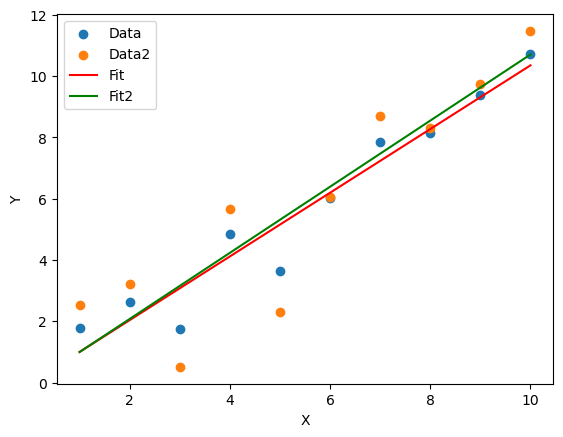

In [45]:
xs = np.arange(1, 11, 1)
std = 1
vals = [std*np.random.randn(10), xs]
ys = np.sum(vals, axis=0)

vals[0] = vals[0]*2
ys2 = np.sum(vals, axis=0)

plt.scatter(xs, ys)
plt.scatter(xs, ys2)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs, np.poly1d(np.polyfit(xs, ys, 1))(xs), color='red')
plt.plot(xs, np.poly1d(np.polyfit(xs, ys2, 1))(xs), color='green')
plt.legend(['Data', 'Data2', 'Fit', 'Fit2'])
plt.show()

##### Standard Error of the Estimate

To quantify our intuition above, we will measure the *standard error of the estimate*. This is computed by summing the square of residuals and dividing by the degrees of freedom minus 2. To get the measurement back to a distance, we take the square root. $$\text{standard error of the estimate} = \sqrt{\frac{\sum(y-\hat{y})^2}{N-2}}$$

By adding and subtracting the standard error of the estimate from our expected value, $\hat{y}$, we can build a confidence interval. $$\text{CI} = (\hat{y}-\text{SE}, \hat{y}+\text{SE})$$

### Confidence Intervals

Although the standard error oft he estimate can help us assess the accuracy of our predictions, we can make more accurate predictions by computing confidence intervals for our predictions, $\hat{y}$.

##### Hypothesis Testing for Slope

Because slope is a function of $r$, the hypothesis test for slope will have the same outcome as a hypothesis test for $r$. Intuitively, this is because both the slope and $r$ measure if two variables, $x$ and $y$, are linearly related.

When conducting hypothesis tests for $r$, we will use some common notation. $$\begin{align}\beta_1 &= \text{population slope}\\ \beta_0 &= \text{population y-intercept} \\ b &= \text{sample slope} \\ a &= \text{sample y-intercept}\end{align}$$

Thus, for hypothesis testing, we will have $$\begin{align}H_0:& \beta_1 = 0 \\ H_A:& \beta_1 \lt 0 \\ &\beta_1 \gt 0 \\ &\beta_1 \neq 0\end{align}$$

##### Example

Let $N=9$, $\alpha=0.05$, and $t=5.77$. For a [two-tailed test](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg), is there enough evident to reject the null? Does there appear to be a significant relationship between $x$ and $y$? Remember: Because $r$ is a measure of the covariance between $x$ and $y$, the total number of degrees of freedom, $df$ is $N-2$.   
Answer: Yes & Yes

### Outliers

It is important to note the impact outliers have on solutions in linear regression (or any statistical analysis). Ensure you view your data and identify any outliers which may be cause for concern.

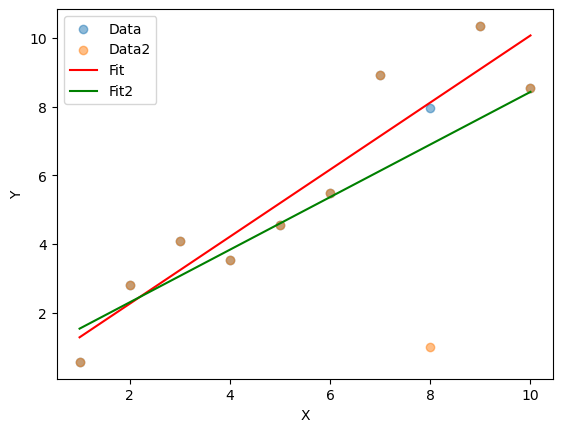

In [56]:
xs = np.arange(1, 11, 1)
std = 1
vals = [std*np.random.randn(10), xs]
ys = np.sum(vals, axis=0)
ys2 = ys.copy()
ys2[7] = 1

plt.scatter(xs, ys, alpha=0.5)
plt.scatter(xs, ys2, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(xs, np.poly1d(np.polyfit(xs, ys, 1))(xs), color='red')
plt.plot(xs, np.poly1d(np.polyfit(xs, ys2, 1))(xs), color='green')
plt.legend(['Data', 'Data2', 'Fit', 'Fit2'])
plt.show()

### [Multiple Linear Regression](https://en.wikipedia.org/wiki/Linear_regression#Formulation)

In simple linear regression, we made predictions, $\hat{y}$ using a single, weighted predictior, $x$. In multiple linear regression, we have multiple predictors.

As an example, imagine we incorporate more than distance traveled as our predictor for flight cost. Maybe seat location, day of the year, time of the year, when the flight is booked, etc. all influence the cost of our flight.

In mathematical notation, we have a vector of regressors,
$$\mathbf{x} = {\begin{bmatrix}x_1\\\ x_2 \\\vdots \\\ x_m\end{bmatrix}.}$$
Thus, our input is a $m \times 1$ vector. To compute $\hat{y}$, we will multiply each of the components of $\mathbf{x}$ by their corresponding regression coefficients (parameters),
$$\boldsymbol{\theta}={\begin{bmatrix}\theta_0\\\theta_1\\\theta_2\\\vdots\\\theta_m\end{bmatrix}.}$$

Note that we included an intercept term $\theta_0$. To simplify the mathematical expression, we will add a $1$ to $\mathbf{x}$ making $$\mathbf{x} = {\begin{bmatrix}1 \\ x_1\\\ x_2 \\\vdots \\\ x_m\end{bmatrix}.}$$
Using vector notation, we now have
$$\hat{y} = \mathbf{x}^T\mathbf{\theta}$$
where by adding an error or noise term, we have
$$y={\hat{y} + \varepsilon =\mathbf{x}^T\mathbf{\theta} + \varepsilon.}$$

Given a data set, $\mathcal{D}$, with $n$ observations, $\{y_i, x_{i1}, \dots, x_{im}\}_{i=1}^{n}$, we can write our observations in matrix form as
$$\mathbf{y}={\begin{bmatrix}y_1\\ y_2 \\\vdots\\ y_n\end{bmatrix},}$$
$$\mathbf{X}={\begin{bmatrix}\mathbf{x}_1^{\mathsf{T}}\\\mathbf{x}_2^{\mathsf{T}}\\\vdots\\\mathbf{x}_n^{\mathsf{T}}\end{bmatrix}={\begin{bmatrix}1&x_{11}&\cdots & x_{1m}\\1&x_{21}&\cdots &x_{2m}\\\vdots &\vdots &\ddots &\vdots \\1&x_{n1}&\cdots &x_{nm}\end{bmatrix}},}$$
where $\mathbf{y}$ is an $n\times 1$ vector, $\mathbf{X}$ is an $n \times m$ matrix, $m$ is the number of features or regression coefficients, and $n$ is the number of observations.

Combining these terms we now have,
$${\mathbf{\hat{y}} = \mathbf{X}\boldsymbol{\theta}.}$$

Furthermore, given our predictions have an error associated with them (as they do not lie perfectly on a line), we will add an error or noise term
$$\boldsymbol{\varepsilon} = {\begin{bmatrix}\varepsilon_1\\\varepsilon_2\\\vdots\\\varepsilon_n\end{bmatrix},}$$
which gives us our final equation
$${\mathbf{y} = \mathbf{\hat{y}}+\boldsymbol{\varepsilon}=\mathbf{X}\boldsymbol{\theta}+\boldsymbol{\varepsilon}.}$$

Our goal is to estimate the regression coefficients $\boldsymbol{\theta}$ such that the error term $\boldsymbol{\varepsilon}=\mathbf{y}-\mathbf{X}\boldsymbol{\theta}$ is minimized.

As previously discussed, it is common to minimize a loss function, $\mathcal{L}$ which is the sum of squared errors where the summation can is also equivalent to the squared [L2-norm](https://en.wikipedia.org/wiki/Norm_(mathematics)#Examples) (also known as the Euclidean norm),
$$\mathcal{L}(\mathbf{\hat{y}}, \mathbf{y}) = {\sum_{i=1}^n\varepsilon_i = \lVert\boldsymbol{\varepsilon}\rVert^2_2.}$$

##### Multiple Correlation Coefficient, $R$

Similar to Pearson's $r$, multiple linear regression has $R$, the multiple correlation coefficient. $R$ tells us the strength of the relationship between $y$ and the combined set of predictors.

$R^2$ tells us the proportion of variability in $Y$ that is explained by our set of predictors.
